# Pymaceuticals Inc.
Observations and Insights
1.	There is a positive correlation between the weight of the mice and the tumor size with a correlation value of 0.84.
2.	Of the 4 drug regimens analyized, Capomulin and Ramicane came up top as the most effective at reducing tumor sizes.
3.	Of the 4 drug regimens analyzed, the least effective were the bottom two drugs Infubinol and Ceftamipomulin
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_frame = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
merged_data_frame = merged_data_frame[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

merged_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
mice_number = len(merged_data_frame['Mouse ID'].unique())
print(f'The total number of unique Mouse IDs in this study is {mice_number}.')

The total number of unique Mouse IDs in this study is 249.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data_frame.loc[merged_data_frame.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = merged_data_frame.loc[merged_data_frame["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_data_frame[merged_data_frame['Mouse ID'].isin(duplicate_mice)==False]
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_dataframe['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).mean()
median = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).median()
var = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).var()
std = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).std()
sem = clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

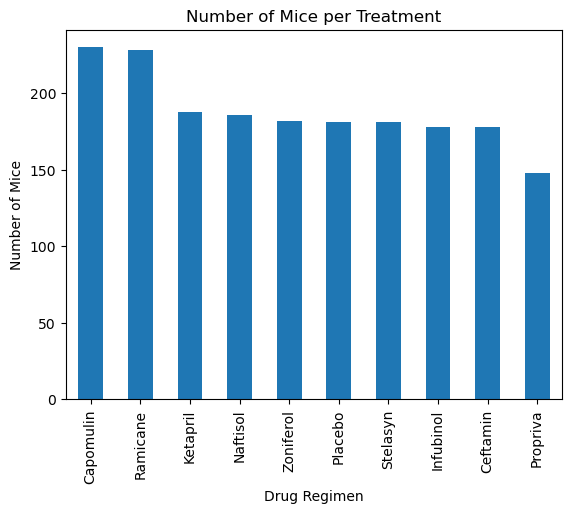

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_dataframe["Drug Regimen"].value_counts()
first_bar_chart = mice_count.plot.bar(color='tab:blue')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

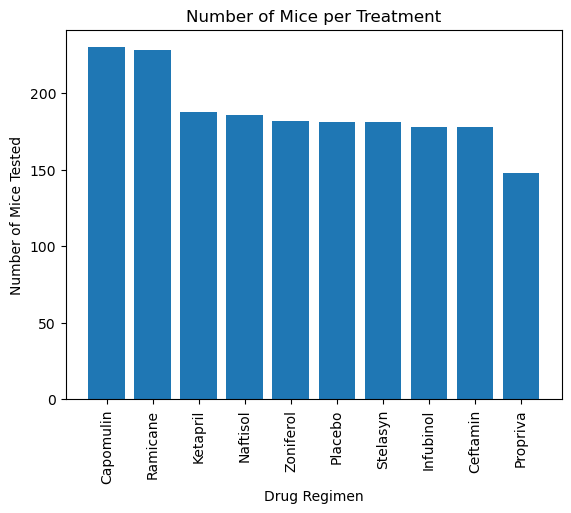

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
# Creating a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')

# Setting the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

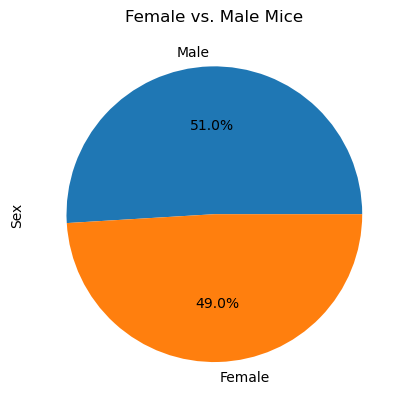

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

sex_data = clean_dataframe["Sex"].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.ylabel('Sex')
plt.show()


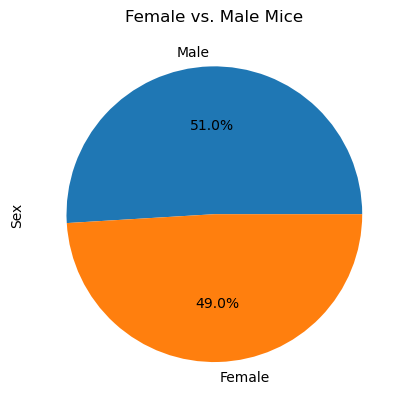

In [12]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.8989395, 50.700902]
plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_dataframe, on=("Mouse ID", "Timepoint"), how="left")

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_dataframe, on=("Mouse ID", "Timepoint"), how="left")

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_dataframe, on=("Mouse ID", "Timepoint"), how="left")

combined_last_timepoint_df = pd.concat([Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge])

combined_last_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = {treatment: [] for treatment in treatments}

for treatment in treatments:
    treatment_df = combined_last_timepoint_df.loc[combined_last_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data[treatment] = treatment_df
    quartiles = treatment_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_df[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    print(f'{treatment} potential outliers: {outliers}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


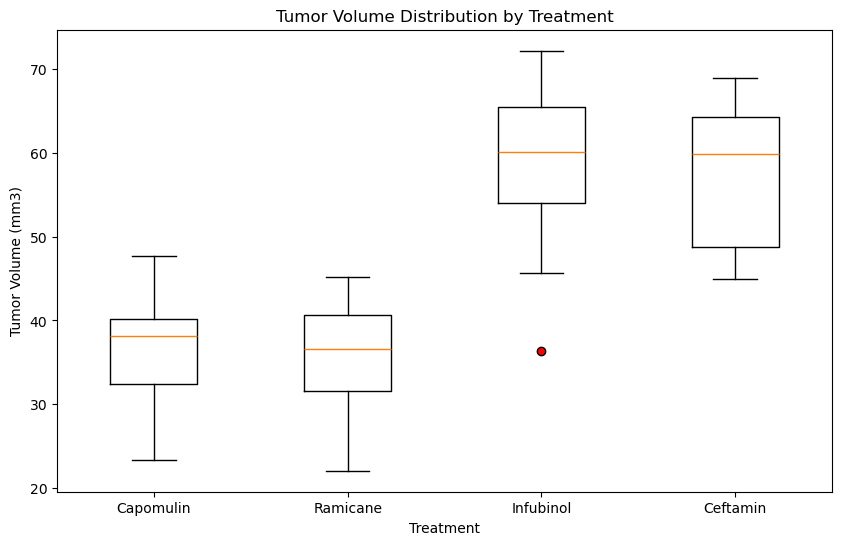

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data_to_plot = [tumor_vol_data[treatment] for treatment in treatments]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_to_plot, tick_labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))

ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

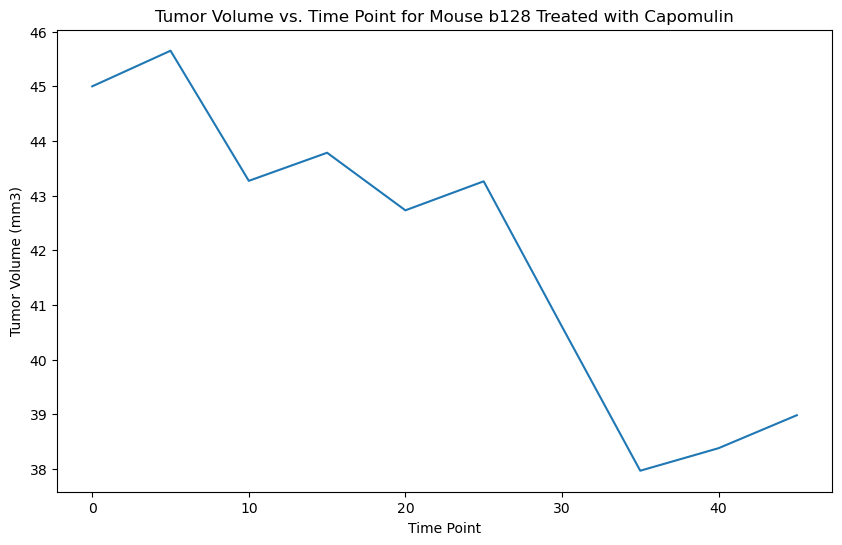

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = Capomulin_df['Mouse ID'].unique()[0]
single_mouse_data = Capomulin_df[Capomulin_df['Mouse ID'] == single_mouse_id]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

ax.set_title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
ax.set_xlabel('Time Point')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

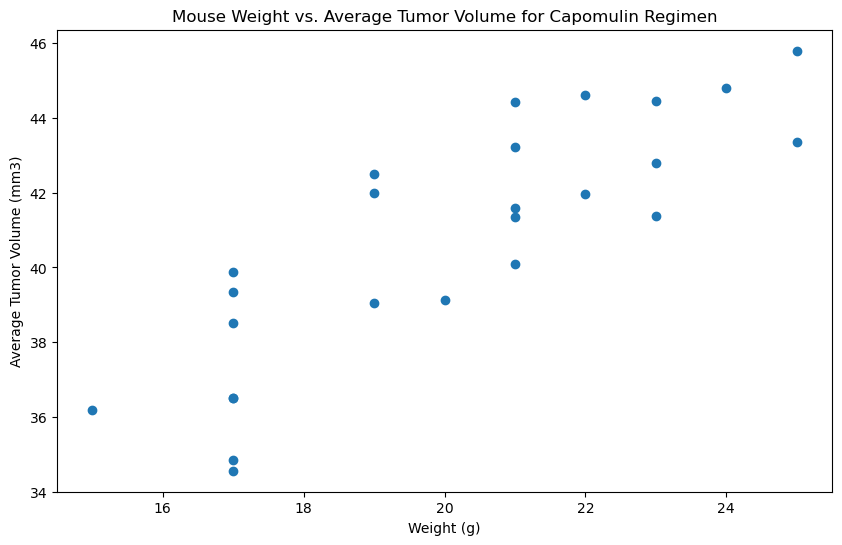

In [17]:
capomulin_avg_tumor_vol = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_tumor_vol = capomulin_avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

capomulin_merged_data = pd.merge(capomulin_avg_tumor_vol, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(capomulin_merged_data['Weight (g)'], capomulin_merged_data['Average Tumor Volume (mm3)'])

ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = capomulin_merged_data['Weight (g)'].corr(capomulin_merged_data['Average Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}')



The correlation between mouse weight and the average tumor volume is: 0.84


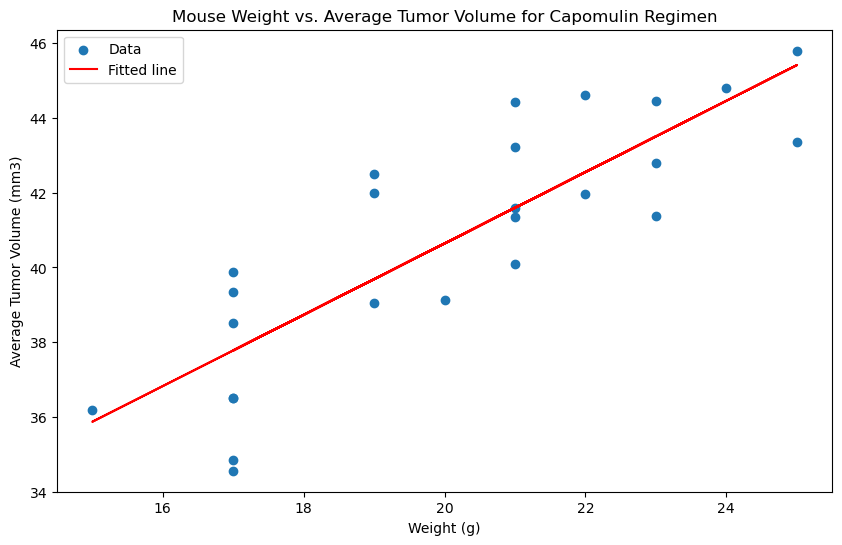

In [19]:
x = capomulin_merged_data['Weight (g)']
y = capomulin_merged_data['Average Tumor Volume (mm3)']

slope, intercept = np.polyfit(x, y, 1)

regression_line = slope * x + intercept

ss_res = np.sum((y - regression_line) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

n = len(x)
std_err = np.sqrt(ss_res / (n - 2))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, label='Data')
ax.plot(x, regression_line, color='red', label='Fitted line')

ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.legend()
plt.show()